<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/Project/VN_Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array

In [ ]:
folder = '/content/drive/MyDrive/AI/VN_Money_Images'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('5k'):
    output= 1.0
  if file.startswith('10k'):
    output= 2.0
  if file.startswith('20k'):
    output= 3.0
  if file.startswith('50k'):
    output= 4.0
  if file.startswith('100k'):
    output= 5.0
  if file.startswith('200k'):
    output= 6.0
  if file.startswith('500k'):
    output= 7.0
  photo = load_img(folder + '/' + file, target_size= (40,40))
  photo= img_to_array(photo)

  photos.append(photo)
  labels.append(output)

photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI/AI_Backup/PROJECT/Money/money_photos.npy', photos)
save('/content/drive/MyDrive/AI/AI_Backup/PROJECT/Money/money_labels.npy', labels)

(140, 40, 40, 3) (140,)


In [ ]:
import numpy as np
# Load images and labels
photos = np.load('/content/drive/MyDrive/AI/AI_Backup/PROJECT/Money/money_photos.npy')
labels = np.load('/content/drive/MyDrive/AI/AI_Backup/PROJECT/Money/money_labels.npy')

# Split data into train & test
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]

In [ ]:
print(test_x.shape)

(14, 40, 40, 3)


In [ ]:
test_x = test_x.reshape((14, 40, 40, 3))
train_x = train_x.reshape((126, 40, 40, 3))
test_x = test_x.astype('float32')/255
train_x = train_x.astype('float32')/255

In [ ]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,8)
test_y = to_categorical(test_y,8)

In [ ]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
loss = losses
batch_size = 50
epochs = 40
classes = 8

In [ ]:
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (40, 40, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))


In [ ]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(128, activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 40, 40, 32)        896       
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 40, 40, 32)        0         
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 20, 20, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 20, 20, 64)        18496     
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
#Compile:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Augment data with ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.5, height_shift_range=0.5, shear_range=0.5, zoom_range=0.5, horizontal_flip=True)
datagen.fit(train_x)
#train model
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)

Epoch 1/40
3/3 [==============================] - 1s 15ms/step - loss: 2.1313 - accuracy: 0.1746
Epoch 2/40
3/3 [==============================] - 0s 11ms/step - loss: 2.0204 - accuracy: 0.1746
Epoch 3/40
3/3 [==============================] - 0s 11ms/step - loss: 1.9587 - accuracy: 0.1905
Epoch 4/40
3/3 [==============================] - 0s 11ms/step - loss: 1.9214 - accuracy: 0.1746
Epoch 5/40
3/3 [==============================] - 0s 11ms/step - loss: 1.7336 - accuracy: 0.3333
Epoch 6/40
3/3 [==============================] - 0s 10ms/step - loss: 1.4525 - accuracy: 0.3889
Epoch 7/40
3/3 [==============================] - 0s 11ms/step - loss: 1.9303 - accuracy: 0.3095
Epoch 8/40
3/3 [==============================] - 0s 10ms/step - loss: 1.8406 - accuracy: 0.3095
Epoch 9/40
3/3 [==============================] - 0s 11ms/step - loss: 1.5175 - accuracy: 0.4206
Epoch 10/40
3/3 [==============================] - 0s 11ms/step - loss: 1.4487 - accuracy: 0.4365
Epoch 11/40
3/3 [============

Test loss: 0.9891272187232971
Test accunacy 0.8571428656578064


Text(0.5, 1.0, 'Training & Testing Accuracy')

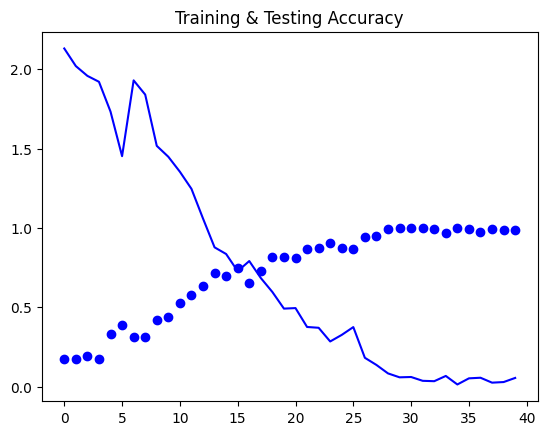

In [ ]:
import matplotlib.pyplot as plt
eval = model.evaluate(test_x, test_y, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

In [ ]:
model.save('/content/drive/MyDrive/AI/AI_Backup/PROJECT/Models/money.h5')

1/1 [==============================] - 0s 21ms/step
50k


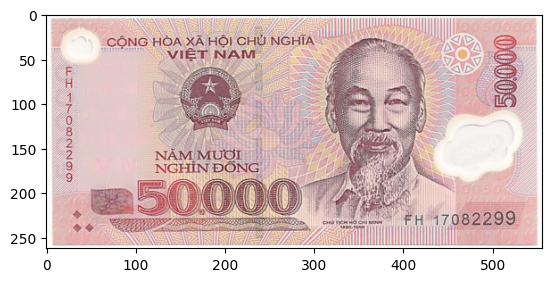

1/1 [==============================] - 0s 19ms/step
500k


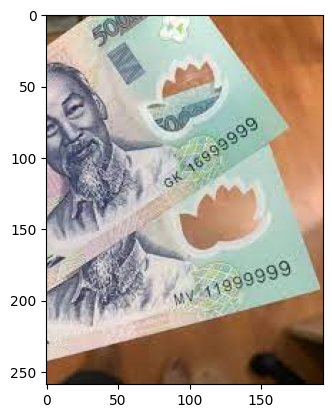

1/1 [==============================] - 0s 19ms/step
10k


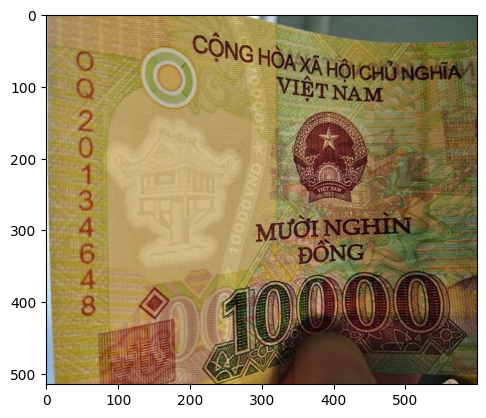

In [ ]:
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/20146191_VO_HUYNH_DUY_THANH/Test_money'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  photo = load_img(folder + '/' +  file, target_size = (40, 40))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','5','10k', '20k', '50k', '100k', '200k', '500k']
  print(class_name[result])
  plt.show()